# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

# Data Gathering

In [2]:
df = pd.read_csv('Sales_data.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df.head().T

,0,1,2,3,4
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Weight,9.3,5.92,17.5,19.2,8.93
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Low Fat
Item_Visibility,0.016047,0.019278,0.01676,0.0,0.0
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household
Item_MRP,249.8092,48.2692,141.618,182.095,53.8614
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013
Outlet_Establishment_Year,1999,2009,1999,1998,1987
Outlet_Size,Medium,Medium,Medium,NaN,High
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df.isna().mean() * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

# EDA

## 1. Item_Identifier

In [7]:
df['Item_Identifier']

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [8]:
df['Item_Identifier'].nunique()

1559

In [9]:
df['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
DRN47     9
FDF56     9
FDW49     9
         ..
FDO33     1
FDC23     1
FDT35     1
FDE52     1
FDY43     1
Name: Item_Identifier, Length: 1559, dtype: int64

## 2. Item_Weight

In [10]:
df['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

<AxesSubplot:xlabel='Item_Weight'>

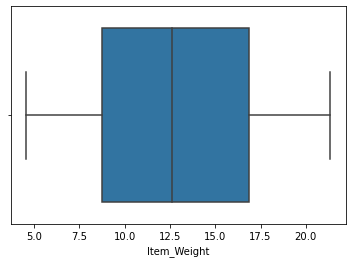

In [11]:
sns.boxplot(df['Item_Weight'])

In [12]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace =True)

In [14]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## 3. Item_Fat_Content

In [15]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [16]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [17]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].apply(lambda x : x.lower() )
df['Item_Fat_Content'].value_counts()

low fat    5201
regular    2889
lf          316
reg         117
Name: Item_Fat_Content, dtype: int64

In [18]:
df['Item_Fat_Content'].replace({'low fat':0, 'regular':1, 'lf':0, 'reg':1}, inplace=True)
df['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

## 4. Item_Visibility

In [19]:
df['Item_Visibility']

0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

In [20]:
df.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.477836,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.000000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,1.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,1.000000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:>

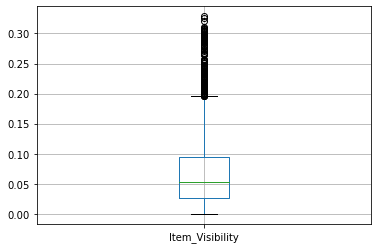

In [21]:
df[['Item_Visibility']].boxplot()

In [22]:
q1 = df['Item_Visibility'].quantile(0.25)
q3 = df['Item_Visibility'].quantile(0.75)
# q2 = df['Item_Visibility'].quantile(0.5)  we can replace it also by median
iqr = q3 -q1
upper_tail = q3 + 1.5*iqr
upper_tail

0.195979015

<AxesSubplot:>

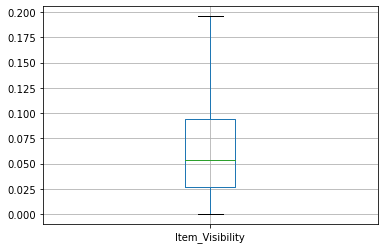

In [23]:
df['Item_Visibility'] = np.where(df['Item_Visibility'] > upper_tail, upper_tail , df['Item_Visibility'])
df[['Item_Visibility']].boxplot()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 799.2+ KB


## 5. Item_Type

In [25]:
df['Item_Type']

0                       Dairy
1                 Soft Drinks
2                        Meat
3       Fruits and Vegetables
4                   Household
                ...          
8518              Snack Foods
8519             Baking Goods
8520       Health and Hygiene
8521              Snack Foods
8522              Soft Drinks
Name: Item_Type, Length: 8523, dtype: object

In [26]:
df['Item_Type'].nunique()

16

In [27]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
df['Item_Type'] = label_enc.fit_transform(df['Item_Type'])
df['Item_Type']

0        4
1       14
2       10
3        6
4        9
        ..
8518    13
8519     0
8520     8
8521    13
8522    14
Name: Item_Type, Length: 8523, dtype: int32

## 6. Item_MRP

In [29]:
df.Item_MRP

0       249.8092
1        48.2692
2       141.6180
3       182.0950
4        53.8614
          ...   
8518    214.5218
8519    108.1570
8520     85.1224
8521    103.1332
8522     75.4670
Name: Item_MRP, Length: 8523, dtype: float64

In [30]:
df.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.065307,7.226681,140.992782,1997.831867,2181.288914
std,4.226124,0.477836,0.048841,4.209990,62.275067,8.371760,1706.499616
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.000000,0.026989,4.000000,93.826500,1987.000000,834.247400
50%,12.857645,0.000000,0.053931,6.000000,143.012800,1999.000000,1794.331000
75%,16.000000,1.000000,0.094585,10.000000,185.643700,2004.000000,3101.296400
max,21.350000,1.000000,0.195979,15.000000,266.888400,2009.000000,13086.964800


<AxesSubplot:>

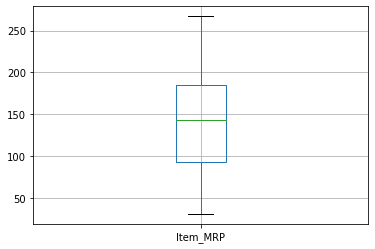

In [31]:
df[['Item_MRP']].boxplot()

## 7. Outlet_Identifier

In [32]:
df['Outlet_Identifier'].nunique()

10

In [33]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [34]:
df['Outlet_Identifier'] = label_enc.fit_transform(df['Outlet_Identifier'])
df['Outlet_Identifier'].value_counts()

5    935
1    932
8    930
9    930
6    930
7    929
3    928
2    926
0    555
4    528
Name: Outlet_Identifier, dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(2), int64(2), object(4)
memory usage: 732.6+ KB


## 8.Outlet_Establishment_Year

In [36]:
df['Outlet_Establishment_Year'].nunique()

9

In [37]:
df['Outlet_Establishment_Year'] = 2022 - df['Outlet_Establishment_Year']
df['Outlet_Establishment_Year']

0       23
1       13
2       23
3       24
4       35
        ..
8518    35
8519    20
8520    18
8521    13
8522    25
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

## 9. Outlet_Size

In [38]:
df['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [39]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [40]:
df['Outlet_Size'].mode()[0]

'Medium'

In [41]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)

In [42]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [43]:
df['Outlet_Size'].replace({'Small':0, 'Medium':1, 'High':2},inplace=True)

## 10. Outlet_Location_Type

In [44]:
df['Outlet_Location_Type']

0       Tier 1
1       Tier 3
2       Tier 1
3       Tier 3
4       Tier 3
         ...  
8518    Tier 3
8519    Tier 2
8520    Tier 2
8521    Tier 3
8522    Tier 1
Name: Outlet_Location_Type, Length: 8523, dtype: object

In [45]:
df['Outlet_Location_Type'].value_counts().to_dict()

{'Tier 3': 3350, 'Tier 2': 2785, 'Tier 1': 2388}

In [46]:
df['Outlet_Location_Type'].replace({'Tier 3': 0, 'Tier 2': 1, 'Tier 1': 2},inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(2), int64(4), object(2)
memory usage: 732.6+ KB


## 11. Outlet_Type

In [48]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [49]:
df_Outlet_Type = pd.get_dummies(df['Outlet_Type'],prefix='Outlet_Type',drop_first=True)
df_Outlet_Type

,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,0
4,1,0,0
...,...,...,...
8518,1,0,0
8519,1,0,0
8520,1,0,0
8521,0,1,0


## Drop Columns

In [50]:
col_list = ['Item_Identifier','Outlet_Type']
df.drop(col_list, axis = 1, inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int64  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   int32  
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   int32  
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   int64  
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(2), int64(4)
memory usage: 599.4 KB


In [52]:
df = pd.concat([df, df_Outlet_Type], axis =1)
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0,0.016047,4,249.8092,9,23,1,2,3735.1380,1,0,0
1,5.920,1,0.019278,14,48.2692,3,13,1,0,443.4228,0,1,0
2,17.500,0,0.016760,10,141.6180,9,23,1,2,2097.2700,1,0,0
3,19.200,1,0.000000,6,182.0950,0,24,1,0,732.3800,0,0,0
4,8.930,0,0.000000,9,53.8614,1,35,2,0,994.7052,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1,35,2,0,2778.3834,1,0,0
8519,8.380,1,0.046982,0,108.1570,7,20,1,1,549.2850,1,0,0
8520,10.600,0,0.035186,8,85.1224,6,18,0,1,1193.1136,1,0,0
8521,7.210,1,0.145221,13,103.1332,3,13,1,0,1845.5976,0,1,0


In [53]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0,0.016047,4,249.8092,9,23,1,2,3735.1380,1,0,0
1,5.920,1,0.019278,14,48.2692,3,13,1,0,443.4228,0,1,0
2,17.500,0,0.016760,10,141.6180,9,23,1,2,2097.2700,1,0,0
3,19.200,1,0.000000,6,182.0950,0,24,1,0,732.3800,0,0,0
4,8.930,0,0.000000,9,53.8614,1,35,2,0,994.7052,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1,35,2,0,2778.3834,1,0,0
8519,8.380,1,0.046982,0,108.1570,7,20,1,1,549.2850,1,0,0
8520,10.600,0,0.035186,8,85.1224,6,18,0,1,1193.1136,1,0,0
8521,7.210,1,0.145221,13,103.1332,3,13,1,0,1845.5976,0,1,0


# Feature Scaling

In [54]:
x = df.drop('Item_Outlet_Sales',axis=1)
y = df['Item_Outlet_Sales']

# Train Test Split

In [55]:
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [56]:
x_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
5470,16.000000,1,0.065329,4,78.4986,3,13,1,0,0,1,0
8431,19.700000,0,0.053331,6,56.7930,7,20,1,1,1,0,0
3557,7.655000,0,0.032010,3,117.2492,7,20,1,1,1,0,0
7918,15.200000,0,0.033651,9,108.9912,9,23,1,2,1,0,0
4573,12.300000,1,0.058106,13,60.4562,6,18,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4829,12.857645,0,0.035863,10,58.3562,5,37,1,0,0,0,1
7291,7.520000,1,0.044023,0,183.0950,8,25,0,2,1,0,0
1344,12.850000,0,0.033173,13,172.0422,6,18,0,1,1,0,0
7293,13.800000,1,0.024660,3,87.4172,0,24,1,0,0,0,0


In [57]:
x_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7186,12.857645,0,0.097430,14,172.8738,5,37,1,0,0,0,1
2283,7.895000,1,0.094567,2,104.5332,8,25,0,2,1,0,0
2206,12.650000,1,0.076199,5,191.3846,7,20,1,1,1,0,0
5446,17.600000,1,0.039382,13,98.0410,3,13,1,0,0,1,0
6380,20.600000,1,0.048033,6,188.2556,7,20,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2879,12.857645,1,0.069909,14,163.2868,4,37,0,2,0,0,0
6094,5.485000,0,0.071558,8,165.7842,0,24,1,0,0,0,0
1598,15.700000,1,0.018969,6,61.9536,7,20,1,1,1,0,0
8012,13.650000,0,0.035954,13,185.2924,6,18,0,1,1,0,0


In [59]:
normal_scaler = MinMaxScaler()
x_train_scaled = normal_scaler.fit_transform(x_train)
x_train_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_train_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.681453,1.0,0.333347,0.266667,0.200377,0.333333,0.000000,0.5,0.0,0.0,1.0,0.0
1,0.901756,0.0,0.272124,0.400000,0.108248,0.777778,0.291667,0.5,0.5,1.0,0.0,0.0
2,0.184579,0.0,0.163332,0.200000,0.364855,0.777778,0.291667,0.5,0.5,1.0,0.0,0.0
3,0.633820,0.0,0.171709,0.600000,0.329804,1.000000,0.416667,0.5,1.0,1.0,0.0,0.0
4,0.461149,1.0,0.296490,0.866667,0.123796,0.666667,0.208333,0.0,0.5,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6813,0.494352,0.0,0.182996,0.666667,0.114883,0.555556,1.000000,0.5,0.0,0.0,0.0,1.0
6814,0.176541,1.0,0.224632,0.000000,0.644338,0.888889,0.500000,0.0,1.0,1.0,0.0,0.0
6815,0.493897,0.0,0.169268,0.866667,0.597424,0.666667,0.208333,0.0,0.5,1.0,0.0,0.0
6816,0.550461,1.0,0.125831,0.200000,0.238233,0.000000,0.458333,0.5,0.0,0.0,0.0,0.0


In [61]:
x_test.reset_index(drop=True, inplace=True)

In [64]:
x_test_scaled = normal_scaler.transform(x_test)
x_test_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)
x_test_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.494352,0.0,0.497145,0.933333,0.600954,0.555556,1.000000,0.5,0.0,0.0,0.0,1.0
1,0.198869,1.0,0.482537,0.133333,0.310882,0.888889,0.500000,0.0,1.0,1.0,0.0,0.0
2,0.481989,1.0,0.388811,0.333333,0.679523,0.777778,0.291667,0.5,0.5,1.0,0.0,0.0
3,0.776719,1.0,0.200948,0.866667,0.283325,0.333333,0.000000,0.5,0.0,0.0,1.0,0.0
4,0.955344,1.0,0.245095,0.400000,0.666242,0.777778,0.291667,0.5,0.5,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1700,0.494352,1.0,0.356718,0.933333,0.560262,0.444444,1.000000,0.0,1.0,0.0,0.0,0.0
1701,0.055374,0.0,0.365130,0.533333,0.570862,0.000000,0.458333,0.5,0.0,0.0,0.0,0.0
1702,0.663590,1.0,0.096790,0.400000,0.130152,0.777778,0.291667,0.5,0.5,1.0,0.0,0.0
1703,0.541530,0.0,0.183458,0.866667,0.653665,0.666667,0.208333,0.0,0.5,1.0,0.0,0.0


## Model Training

In [65]:
knn_model = KNeighborsRegressor(n_neighbors=9,p=2)
knn_model.fit(x_train_df,y_train)

KNeighborsRegressor(n_neighbors=9)

# Evaluation

In [66]:
# Testing Data Accuracy
y_pred = knn_model.predict(x_test_df)
mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error :',mse)
mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error :',mae)
R2_Score = r2_score(y_test,y_pred)
print('R2 Score :',R2_Score)

Mean Squared Error : 1327363.1638823233
Mean Absolute Error : 816.6055006321278
R2 Score : 0.5528372564314702


In [67]:
# Training data accuracy
y_pred_train = knn_model.predict(x_train_df)
mse = mean_squared_error(y_train,y_pred_train)
print('Mean Squared Error :',mse)
mae = mean_absolute_error(y_train,y_pred_train)
print('Mean Absolute Error :',mae)
R2_Score_train = r2_score(y_train,y_pred_train)
print('R2 Score :',R2_Score_train)

Mean Squared Error : 1050863.0483412656
Mean Absolute Error : 725.9006295329357
R2 Score : 0.6373160112696431


# Hyperparameter Tuning

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
knn_model = KNeighborsRegressor()
hyp = {'n_neighbors':np.arange(8,40),
      'p':[1,2]}
gscv_knn_model = GridSearchCV(knn_model, hyp, cv=5)
gscv_knn_model.fit(x_train_df,y_train)
gscv_knn_model.best_estimator_

KNeighborsRegressor(n_neighbors=26)

In [70]:
gscv_knn_model.best_params_

{'n_neighbors': 26, 'p': 2}

In [71]:
# Testing
y_pred = gscv_knn_model.predict(x_test_df)
mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error :',mse)
mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error :',mae)
R2_Score = r2_score(y_test,y_pred)
print('R2 Score :',R2_Score)

Mean Squared Error : 1253484.332311608
Mean Absolute Error : 796.1794702097902
R2 Score : 0.5777255928835485


In [72]:
# training 
y_pred_train = gscv_knn_model.predict(x_train_df)
mse = mean_squared_error(y_train,y_pred_train)
print('Mean Squared Error :',mse)
mae = mean_absolute_error(y_train,y_pred_train)
print('Mean Absolute Error :',mae)
R2_Score_train = r2_score(y_train,y_pred_train)
print('R2 Score :',R2_Score_train)

Mean Squared Error : 1165975.7887931417
Mean Absolute Error : 774.1704205034187
R2 Score : 0.5975871922511533
